# Project 1 - Regression Task

## Importing csv file using Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

In [3]:
data = pd.read_csv("data1.csv")

In [4]:
df=pd.DataFrame(data)

## Exploring data

In [5]:
df.shape

(2017, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
id                  2017 non-null int64
acousticness        2016 non-null float64
danceability        2015 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    1978 non-null float64
key                 2015 non-null float64
liveness            2016 non-null float64
loudness            2017 non-null float64
mode                1995 non-null float64
speechiness         2017 non-null float64
tempo               2016 non-null float64
time_signature      1984 non-null float64
valence             2016 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(12), int64(3), object(2)
memory usage: 268.0+ KB


In [7]:
df.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2.0,0.1650,-8.795,1.0,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1.0,0.1370,-10.401,1.0,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2.0,0.1590,-7.148,1.0,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5.0,0.0922,-15.236,1.0,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5.0,0.4390,-11.648,0.0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [8]:
df.tail()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
2012,2012,0.00106,0.584,274404,0.932,0.002690,1.0,0.1290,-3.501,1.0,0.333,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1.0,0.0528,-2.663,1.0,0.131,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0.0,0.2140,-2.467,1.0,0.107,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1.0,0.0913,-2.735,1.0,0.133,150.011,4.0,0.623,0,First Contact,Twin Moons
2016,2016,0.00281,0.446,204520,0.915,0.000039,9.0,0.2180,-6.221,1.0,0.141,190.013,4.0,0.402,0,I Wanna Get Better,Bleachers


In [9]:
df.describe()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2016.000000,2015.000000,2.017000e+03,2017.000000,1978.000000,2015.000000,2016.000000,2017.000000,1995.00000,2017.000000,2016.000000,1984.000000,2016.000000,2017.000000
mean,1008.000000,0.187678,0.618478,2.463062e+05,0.681577,0.135335,5.347891,0.190888,-7.085624,0.61604,0.092664,121.607967,3.967742,0.496683,0.505702
std,582.402066,0.260024,0.161029,8.198181e+04,0.210273,0.274875,3.646163,0.155479,3.761684,0.48647,0.089931,26.691391,0.257940,0.247186,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.00000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009590,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092275,-8.394000,0.00000,0.037500,100.164000,4.000000,0.295000,0.000000
50%,1008.000000,0.063500,0.631000,2.292610e+05,0.715000,0.000093,6.000000,0.127000,-6.248000,1.00000,0.054900,121.468000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.056600,9.000000,0.247000,-4.746000,1.00000,0.108000,137.860500,4.000000,0.690250,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.00000,0.816000,219.331000,5.000000,0.992000,1.000000


In [10]:
df.dtypes

id                    int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
mode                float64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

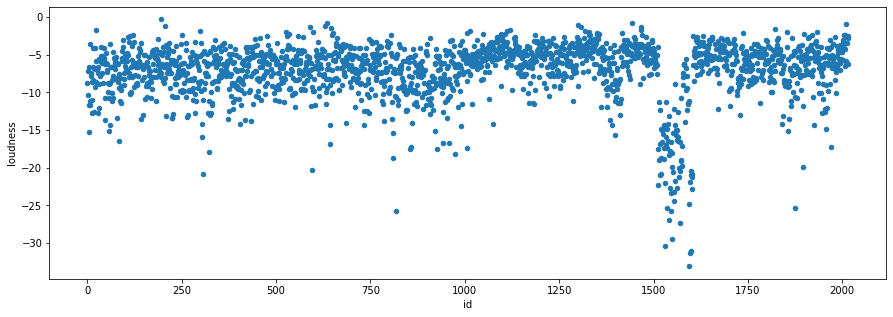

In [11]:
df.plot(x = 'id',y = 'loudness',kind = 'scatter',figsize = (15,5))

## Checking for missing data and imputing

In [12]:
df.isnull().sum()

id                   0
acousticness         1
danceability         2
duration_ms          0
energy               0
instrumentalness    39
key                  2
liveness             1
loudness             0
mode                22
speechiness          0
tempo                1
time_signature      33
valence              1
target               0
song_title           0
artist               0
dtype: int64

In [13]:
print(df['acousticness'].mean())

0.187677678288691


In [14]:
df['acousticness'].fillna(0.1876,inplace=True)

In [15]:
df.dtypes

id                    int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
mode                float64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

In [16]:
df.isnull().sum()

id                   0
acousticness         0
danceability         2
duration_ms          0
energy               0
instrumentalness    39
key                  2
liveness             1
loudness             0
mode                22
speechiness          0
tempo                1
time_signature      33
valence              1
target               0
song_title           0
artist               0
dtype: int64

In [17]:
print(df['danceability'].mean())

0.6184779156327529


In [18]:
df['danceability'].fillna(0.6185,inplace=True)

In [19]:
df.isnull().sum()

id                   0
acousticness         0
danceability         0
duration_ms          0
energy               0
instrumentalness    39
key                  2
liveness             1
loudness             0
mode                22
speechiness          0
tempo                1
time_signature      33
valence              1
target               0
song_title           0
artist               0
dtype: int64

In [20]:
print(df['instrumentalness'].mean())

0.1353349620424672


In [21]:
df['instrumentalness'].fillna(0.1353,inplace=True)

In [22]:
print(df['key'].mean())

5.347890818858561


In [23]:
df['key'].fillna(0.3479,inplace=True)

In [24]:
print(df['liveness'].mean())

0.19088759920634923


In [25]:
df['liveness'].fillna(0.1909,inplace=True)

In [26]:
df['mode'].fillna(0,inplace=True)

In [27]:
print(df['tempo'].mean())

121.60796726190478


In [28]:
df['tempo'].fillna(121.6080,inplace=True)

In [29]:
df['time_signature'].fillna(3,inplace=True)

In [30]:
print(df['valence'].mean())

0.49668298611111134


In [31]:
df['valence'].fillna(0.4969,inplace=True)

In [32]:
df.dtypes

id                    int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
mode                float64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

In [33]:
df.isnull().sum()

id                  0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [34]:
df.drop(['song_title','artist'],axis=1,inplace=True)

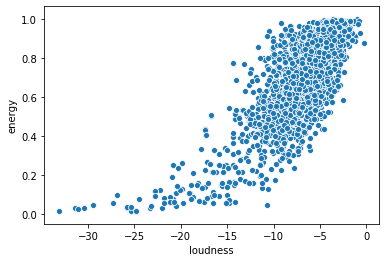

In [35]:
sns.scatterplot(x='loudness',y='energy',data=df)

In [36]:
df.shape

(2017, 15)

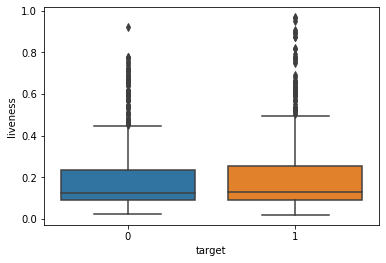

In [37]:
sns.boxplot(x='target',y='liveness',data=df)

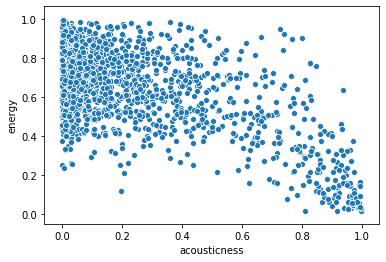

In [38]:
sns.scatterplot(x='acousticness',y='energy',data=df)

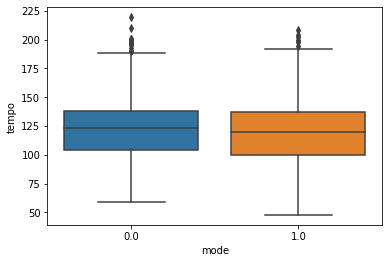

In [39]:
sns.boxplot(x='mode',y='tempo',data=df)

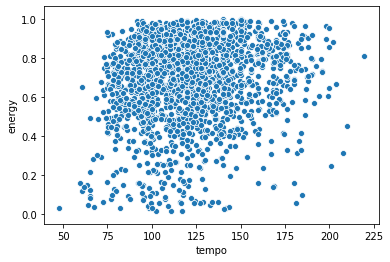

In [40]:
sns.scatterplot(x='tempo',y='energy',data=df)

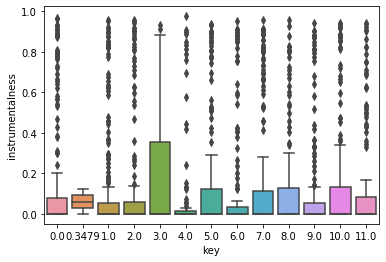

In [41]:
sns.boxplot(x='key',y='instrumentalness',data=df)

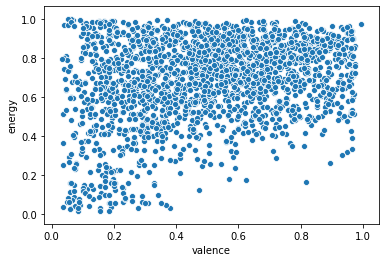

In [42]:
sns.scatterplot(x='valence',y='energy',data=df)

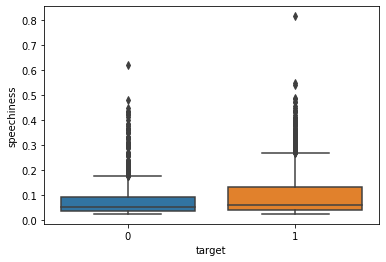

In [43]:
sns.boxplot(x='target',y='speechiness',data=df)

## Checking correlation between variables

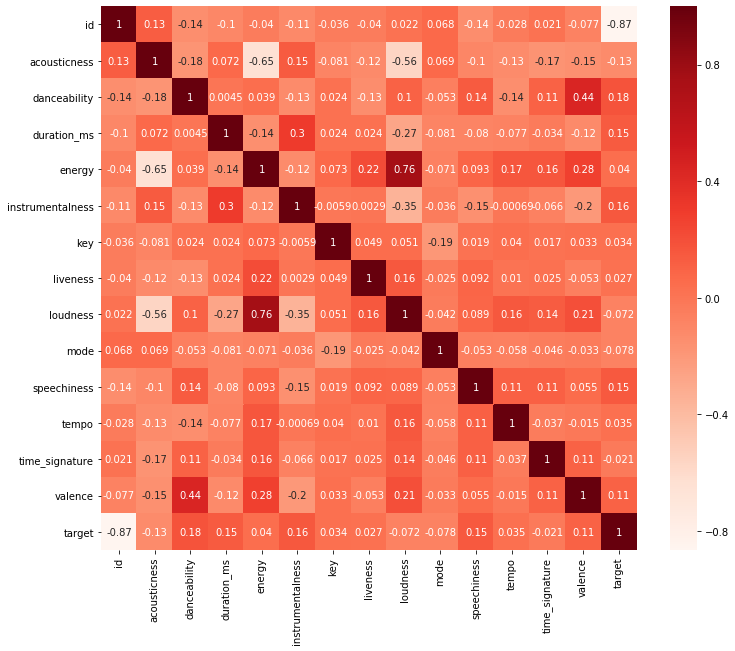

In [44]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Applying MinMaxScaler technique for scaling

### MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution. It doesn't meaningfully change the information embedded in the original data. MinMaxScaler doesn't reduce the importance of outliers. So, we decided to use this scaling method.  

In [45]:
from sklearn.preprocessing import 
from sklearn.model_selection import train_test_split

In [46]:
y = df.energy.values
X = df.drop('energy',axis = 1).values

In [47]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [48]:
X_train_org.shape

(1512, 14)

In [49]:
X_test_org.shape

(505, 14)

In [50]:
y_train.shape

(1512,)

In [51]:
y_test.shape

(505,)

## Linear Regression

In [52]:
from sklearn.model_selection import GridSearchCV
model = LinearRegression()
parameters = {'normalize':[True,False]}
grid_search_lr = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search_lr.fit(X_train_org, y_train)
print("Best parameters: {}".format(grid_search_lr.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_lr.best_score_))

Best parameters: {'normalize': True}
Best cross-validation score: 0.7111


In [53]:
results = pd.DataFrame(grid_search_lr.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.000997,0.000576,0.000665,0.00047,True,{'normalize': True},0.694874,0.730112,0.712176,0.713991,...,0.0167,1,0.720877,0.714072,0.718125,0.717896,0.714576,0.723268,0.718135,0.003243
1,0.000665,0.000470,0.000333,0.00047,False,{'normalize': False},0.694874,0.730112,0.712176,0.713991,...,0.0167,2,0.720877,0.714072,0.718125,0.717896,0.714576,0.723268,0.718135,0.003243


In [54]:
lreg = LinearRegression(normalize = True)
lreg.fit(X_train_org, y_train)
print("Train score: %.4f"%lreg.score(X_train_org, y_train))
print("Test score: %.4f"%lreg.score(X_test_org, y_test))

Train score: 0.7177
Test score: 0.7076


In [55]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=6)
print("Cross-validation scores: {}".format(cross_val_score(lreg , X_train_org, y_train, cv=kfold)))
scores = cross_val_score(lreg , X_train_org, y_train, cv=kfold)
print("Mean Score: {}".format(np.mean(scores)))

Cross-validation scores: [0.69487396 0.73011237 0.71217605 0.71399114 0.73017682 0.68511507]
Mean Score: 0.7110742337553724


Text(0.5, 0, 'liveness')

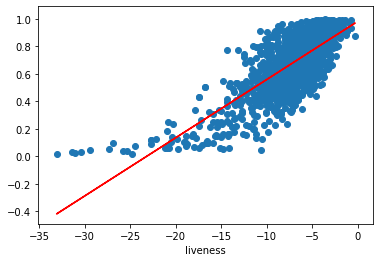

In [56]:
#PLOT

%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train_org[:,7].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('liveness')

### Linear Regression Result:

#### Best Parameter: {'normalize': True}

#### Test Score: 0.7076

#### Mean Cross - Validation Score:  0.7111

## KNN Regression

In [57]:
grid_parms_knn = {'n_neighbors':[1,5,10,15,20]}

In [58]:
knn = KNeighborsRegressor()
grid_search_knn = GridSearchCV(knn, grid_parms_knn,cv=6,return_train_score=True,n_jobs= -1)
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [59]:
print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_knn.best_score_))
pd.DataFrame(grid_search_knn.cv_results_)

Best parameters: {'n_neighbors': 10}
Best cross-validation score: 0.5501


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.001994,7.380714e-07,0.009475,0.003442,1,{'n_neighbors': 1},0.216676,0.416423,0.221351,0.294812,...,0.072117,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.001828,3.713717e-04,0.008644,0.001371,5,{'n_neighbors': 5},0.528467,0.592313,0.518887,0.496779,...,0.030758,4,0.688873,0.673805,0.687439,0.698619,0.683401,0.699383,0.688587,0.008794
2,0.001828,3.721016e-04,0.009973,0.000997,10,{'n_neighbors': 10},0.538240,0.575581,0.578191,0.537606,...,0.023180,1,0.622419,0.620212,0.622489,0.629707,0.620659,0.630951,0.624406,0.004285
3,0.002327,4.700218e-04,0.016124,0.008490,15,{'n_neighbors': 15},0.537996,0.566426,0.578569,0.523534,...,0.024001,2,0.598072,0.596351,0.596637,0.603655,0.593035,0.607091,0.599140,0.004762
4,0.001662,4.702466e-04,0.010638,0.002351,20,{'n_neighbors': 20},0.541154,0.562589,0.555201,0.505556,...,0.022395,3,0.579491,0.570311,0.576724,0.583245,0.573666,0.587022,0.578410,0.005622


In [60]:
knn = KNeighborsRegressor(n_neighbors = 10)
knn.fit(X_train, y_train)
print("Train score: %.4f"%knn.score(X_train, y_train))
print("Test score: %.4f"%knn.score(X_test, y_test))

Train score: 0.6304
Test score: 0.5436


In [61]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:{}".format(cross_val_score(knn , X_train, y_train, cv=kfold)))
scores = cross_val_score(knn , X_train, y_train, cv=kfold)
print("Mean score: {}".format(np.mean(scores)))

Cross-validation scores:[0.53823978 0.57558145 0.57819096 0.53760581 0.55872164 0.51249119]
Mean score: 0.5501384708780596


Text(0.5, 0, 'liveness')

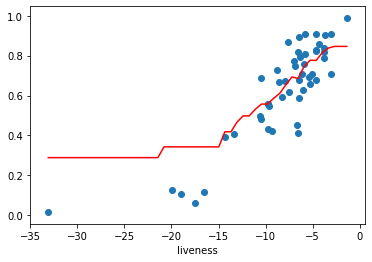

In [62]:
X_b = X_train_org[:50,7].reshape(-1,1)
y_b = y_train[:50]

knn_reg = KNeighborsRegressor(10)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('liveness')

### KNN Regression Result:

#### Best Parameter: {'n_neighbours': 10}

#### Test Score: 0.5436

#### Mean Cross - Validation Score: 0.5501

## Ridge Regression

In [63]:
grid_parms_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [64]:
ridge = Ridge()
grid_search_ridge = GridSearchCV(estimator = ridge,param_grid = grid_parms_ridge,return_train_score=True,n_jobs= -1,cv=5)
grid_search_ridge.fit(X_train_org, y_train)
print("Best parameters: {}".format(grid_search_ridge.best_params_))

print("Best cross-validation score: {:.4f}".format(grid_search_ridge.best_score_))

Best parameters: {'alpha': 1}
Best cross-validation score: 0.7097


In [65]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train_org, y_train)
print("Train score: %.4f"%ridge.score(X_train_org, y_train))
print("Test score: %.4f"%ridge.score(X_test_org, y_test))

Train score: 0.7176
Test score: 0.7081


In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:{}".format(cross_val_score(ridge , X_train_org, y_train, cv=kfold)))
scores = cross_val_score(ridge , X_train_org, y_train, cv=kfold)
print("Mean Score: {}".format(np.mean(scores)))

Cross-validation scores:[0.69700194 0.72995941 0.71118561 0.71444322 0.72959769 0.68447566]
Mean Score: 0.7111105884030096


In [67]:
result_ridge = pd.DataFrame(grid_search_ridge.cv_results_)
result_ridge

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002594,0.001197,0.000997,0.000630,0.01,{'alpha': 0.01},0.689522,0.727080,0.704408,0.710773,...,0.709612,0.012514,3,0.722661,0.713869,0.719999,0.718210,0.717316,0.718411,0.002914
1,0.001795,0.000746,0.000598,0.000489,0.1,{'alpha': 0.1},0.689755,0.727051,0.704312,0.710811,...,0.709628,0.012433,2,0.722659,0.713868,0.719998,0.718208,0.717315,0.718410,0.002914
2,0.000997,0.000001,0.000598,0.000488,1,{'alpha': 1},0.691825,0.726692,0.703320,0.711009,...,0.709673,0.011710,1,0.722528,0.713759,0.719904,0.718092,0.717219,0.718300,0.002908
3,0.000598,0.000489,0.000598,0.000488,10,{'alpha': 10},0.700032,0.719805,0.692404,0.705378,...,0.704993,0.009037,4,0.716261,0.708256,0.715058,0.712528,0.712235,0.712868,0.002760
4,0.000399,0.000489,0.000399,0.000489,100,{'alpha': 100},0.677542,0.666238,0.631053,0.641720,...,0.654891,0.016687,5,0.659856,0.657195,0.667271,0.663157,0.662430,0.661982,0.003376


Text(0.5, 0, 'Alpha')

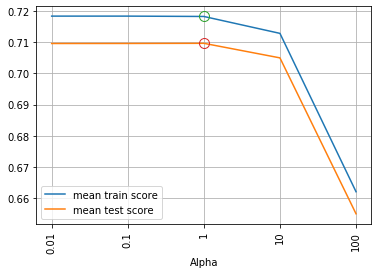

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(result_ridge.shape[0]), result_ridge['mean_train_score'], label = 'mean train score')
plt.plot(range(result_ridge.shape[0]), result_ridge['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_ridge.shape[0]), result_ridge['param_alpha'], rotation = 90)
plt.plot([grid_search_ridge.best_index_], result_ridge['mean_train_score'][grid_search_ridge.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_search_ridge.best_index_], result_ridge['mean_test_score'][grid_search_ridge.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('Alpha')

### Ridge Regression Result:

#### Best Parameter: {'alpha': 1}

#### Test Score: 0.7081

####  Mean Cross - Validation Score: 0.7111

## Lasso Regression

In [69]:
grid_parms_lasso = {'alpha': [0.01, 0.1, 1, 10,100]}

In [70]:
lasso = Lasso()
grid_search_lasso = GridSearchCV(estimator = lasso,param_grid = grid_parms_lasso,return_train_score=True,n_jobs=-1,cv=5)
grid_search_lasso.fit(X_train_org, y_train)
print("Best parameters: {}".format(grid_search_lasso.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_lasso.best_score_))

Best parameters: {'alpha': 0.01}
Best cross-validation score: 0.6019


In [71]:
lass = Lasso(alpha = 10)
lass.fit(X_train_org, y_train)
print("Train score: %.4f"%lass.score(X_train_org, y_train))
print("Test score: %.4f"%lass.score(X_test_org, y_test))

Train score: 0.0242
Test score: 0.0109


In [72]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:{}".format(cross_val_score(lass , X_train_org, y_train, cv=kfold)))
scores = cross_val_score(lass , X_train_org, y_train, cv=kfold)
print("Mean score: {}".format(np.mean(scores)))

Cross-validation scores:[-0.01768529  0.03496816  0.02732426  0.02545754  0.04235233  0.0180592 ]
Mean score: 0.021746031736557203


In [73]:
result_lasso = pd.DataFrame(grid_search_lasso.cv_results_)
result_lasso

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001089,0.000212,0.000399,0.000489,0.01,{'alpha': 0.01},0.639759,0.610485,0.576364,0.570934,...,0.601946,0.025383,1,0.614529,0.599882,0.616139,0.607712,0.611319,0.609916,0.005788
1,0.000798,0.000399,0.000598,0.000489,0.1,{'alpha': 0.1},0.609687,0.581296,0.541413,0.531421,...,0.571430,0.030115,2,0.567337,0.571830,0.584173,0.583689,0.575168,0.576440,0.006604
2,0.000598,0.000488,0.000399,0.000489,1,{'alpha': 1},-0.018465,0.050071,0.034092,0.000459,...,0.022188,0.026682,3,0.037479,0.019034,0.026856,0.039255,0.022611,0.029047,0.008022
3,0.000399,0.000488,0.000403,0.000493,10,{'alpha': 10},-0.017375,0.043762,0.029129,-0.001722,...,0.019891,0.025217,4,0.033080,0.018075,0.022967,0.029772,0.018205,0.024420,0.006077
4,0.000818,0.000411,0.000000,0.000000,100,{'alpha': 100},-0.016383,0.042914,0.028822,-0.000841,...,0.019828,0.024379,5,0.033052,0.018040,0.022939,0.029742,0.018174,0.024390,0.006078


Text(0.5, 0, 'Alpha')

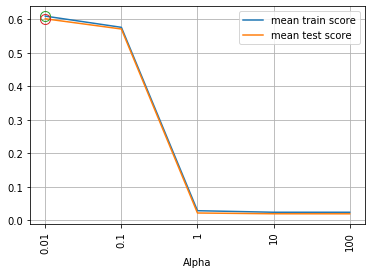

In [74]:
%matplotlib inline

plt.plot(range(result_lasso.shape[0]), result_lasso['mean_train_score'], label = 'mean train score')
plt.plot(range(result_lasso.shape[0]), result_lasso['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_lasso.shape[0]), result_lasso['param_alpha'], rotation = 90)
plt.plot([grid_search_lasso.best_index_], result_lasso['mean_train_score'][grid_search_lasso.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_search_lasso.best_index_], result_lasso['mean_test_score'][grid_search_lasso.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('Alpha')

### Lasso Regression Result:

#### Best Parameter: {'alpha': 0.01}

#### Test Score: 0.0109

#### Mean Cross - Validation Score: 0.0217

## Polynomial Regression

In [75]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [76]:
param_grid_poly = {'polynomialfeatures__degree': np.arange(3)}

grid_poly = GridSearchCV(PolynomialRegression(), param_grid_poly,return_train_score=True,n_jobs=-1,cv=5)

In [77]:
grid_poly.fit(X_train_org, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'polynomialfeatures__degree': array([0, 1, 2])},
             pre_dispatch='

In [78]:
print("Best parameters: {}".format(grid_poly.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_poly.best_score_))

Best parameters: {'polynomialfeatures__degree': 1}
Best cross-validation score: 0.7096


In [79]:
pol = PolynomialFeatures(degree = 2)
X_pol = pol.fit_transform(X_train_org)
Xt_pol = pol.fit_transform(X_test_org)
pol_reg = LinearRegression()
pol_reg.fit(X_pol,y_train)
print("Train score: {}".format(pol_reg.score(X_pol, y_train)))
print("Test score: {}".format(pol_reg.score(Xt_pol, y_test)))

Train score: 0.7827811083369883
Test score: 0.7256474873336659


In [80]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=6)
print("Cross-validation scores:{}".format(cross_val_score(pol_reg , X_pol, y_train, cv=kfold)))
scores = cross_val_score(pol_reg , X_pol, y_train, cv=kfold)
print("Mean score: {}".format(np.mean(scores)))

Cross-validation scores:[0.71923386 0.778345   0.7475032  0.59996773 0.72390367 0.72351814]
Mean score: 0.7154119329445628


In [81]:
result_poly = pd.DataFrame(grid_poly.cv_results_)
result_poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000997,3.693565e-07,0.000997,7.478899e-07,0,{'polynomialfeatures__degree': 0},-0.002549,-0.000035,-0.000146,-0.000992,...,-0.000864,0.000910,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.001995,4.156970e-07,0.000997,5.519789e-07,1,{'polynomialfeatures__degree': 1},0.689496,0.727083,0.704418,0.710769,...,0.709610,0.012523,1,0.722661,0.713869,0.719999,0.718210,0.717316,0.718411,0.002914
2,0.014560,1.197283e-03,0.002792,7.462263e-04,2,{'polynomialfeatures__degree': 2},0.713884,0.779412,0.478235,0.714518,...,0.686023,0.106550,2,0.791180,0.778908,0.544819,0.787844,0.787414,0.738033,0.096692


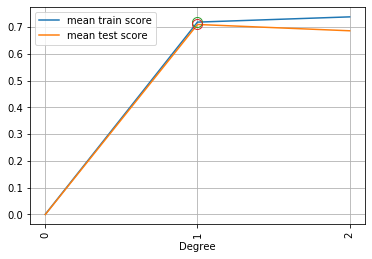

In [82]:
plt.plot(range(result_poly.shape[0]), result_poly['mean_train_score'], label = 'mean train score')
plt.plot(range(result_poly.shape[0]), result_poly['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_poly.shape[0]), result_poly['param_polynomialfeatures__degree'], rotation = 90)
plt.plot([grid_poly.best_index_], result_poly['mean_train_score'][grid_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_poly.best_index_], result_poly['mean_test_score'][grid_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.xlabel('Degree')
plt.legend()

### Polynomial Regression Result:

#### Best Parameter: {'polynomialfeatures__degree': 1}

#### Test Score: 0.7256

#### Mean Cross - Validation Score: 0.7154

## Linear (Simple) SVR

In [83]:
grid_parms_svrl = {'C': [0.01, 0.1, 1, 10, 100], 'epsilon' : [0.01, 0.1, 1, 10, 100]}

In [84]:
linearsvr = LinearSVR()
grid_svrl = GridSearchCV(estimator = linearsvr,param_grid = grid_parms_svrl,return_train_score=True,n_jobs= -1,cv=10)

In [85]:
grid_svrl.fit(X_train,y_train)

C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'epsilon': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [86]:
print("Best parameters: {}".format(grid_svrl.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svrl.best_score_))

Best parameters: {'C': 1, 'epsilon': 0.1}
Best cross-validation score: 0.7064


In [87]:
lsvr = LinearSVR(C = 100, epsilon = 1)
        
lsvr.fit(X_train, y_train)

print("Train score: {}".format(lsvr.score(X_train, y_train)))
print("Test score: {}".format(lsvr.score(X_test, y_test)))

Train score: -10.529286326571544
Test score: -10.459881592466767


In [88]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=10)
print("Cross-validation scores:{}".format(cross_val_score(lsvr , X_train, y_train, cv=kfold)))
scores = cross_val_score(lsvr, X_train, y_train, cv=kfold)
print("Mean score: {}".format(np.mean(scores)))

Cross-validation scores:[-10.5620073  -11.82924042  -8.46538475 -10.2700883  -10.68275818
 -11.84745851 -12.37334949  -9.50995206  -9.61517716 -11.48625867]
Mean score: -10.664167484222427


In [89]:
result_linearsvr = pd.DataFrame(grid_svrl.cv_results_)
result_linearsvr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001706,4.472966e-04,0.000798,0.000399,0.01,0.01,"{'C': 0.01, 'epsilon': 0.01}",0.656294,0.593975,0.726435,...,0.651470,0.663128,0.659067,0.667800,0.662398,0.657662,0.654418,0.664752,0.661251,0.005400
1,0.001799,4.009818e-04,0.000399,0.000488,0.01,0.1,"{'C': 0.01, 'epsilon': 0.1}",0.631826,0.573992,0.696991,...,0.629545,0.643003,0.638154,0.646579,0.642058,0.637321,0.637068,0.645633,0.640693,0.005130
2,0.000798,3.989819e-04,0.000499,0.000499,0.01,1,"{'C': 0.01, 'epsilon': 1}",-10.562007,-11.829240,-8.465385,...,-10.821266,-10.558814,-10.513738,-10.399740,-10.355896,-10.657840,-10.642934,-10.432109,-10.531052,0.137191
3,0.000997,8.546566e-07,0.000798,0.000399,0.01,10,"{'C': 0.01, 'epsilon': 10}",-10.562007,-11.829240,-8.465385,...,-10.821266,-10.558814,-10.513738,-10.399740,-10.355896,-10.657840,-10.642934,-10.432109,-10.531052,0.137191
4,0.001097,6.998098e-04,0.000897,0.000299,0.01,100,"{'C': 0.01, 'epsilon': 100}",-10.562007,-11.829240,-8.465385,...,-10.821266,-10.558814,-10.513738,-10.399740,-10.355896,-10.657840,-10.642934,-10.432109,-10.531052,0.137191
5,0.008574,1.907269e-03,0.000798,0.000399,0.1,0.01,"{'C': 0.1, 'epsilon': 0.01}",0.728253,0.641651,0.760515,...,0.708559,0.717053,0.712609,0.718756,0.713822,0.714914,0.708968,0.719592,0.714858,0.004316
6,0.006881,6.983354e-04,0.000499,0.000499,0.1,0.1,"{'C': 0.1, 'epsilon': 0.1}",0.712663,0.634289,0.759549,...,0.704241,0.712720,0.708616,0.715605,0.710871,0.710928,0.704690,0.716631,0.711111,0.004633
7,0.000698,6.390299e-04,0.000448,0.000468,0.1,1,"{'C': 0.1, 'epsilon': 1}",-10.562007,-11.829240,-8.465385,...,-10.821266,-10.558814,-10.513738,-10.399740,-10.355896,-10.657840,-10.642934,-10.432109,-10.531052,0.137191
8,0.000998,3.099442e-07,0.000798,0.000399,0.1,10,"{'C': 0.1, 'epsilon': 10}",-10.562007,-11.829240,-8.465385,...,-10.821266,-10.558814,-10.513738,-10.399740,-10.355896,-10.657840,-10.642934,-10.432109,-10.531052,0.137191
9,0.000898,2.993231e-04,0.000698,0.000457,0.1,100,"{'C': 0.1, 'epsilon': 100}",-10.562007,-11.829240,-8.465385,...,-10.821266,-10.558814,-10.513738,-10.399740,-10.355896,-10.657840,-10.642934,-10.432109,-10.531052,0.137191


Text(0.5, 0, 'Alpha')

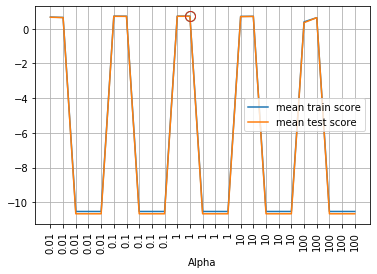

In [90]:
plt.plot(range(result_linearsvr.shape[0]), result_linearsvr['mean_train_score'], label = 'mean train score')
plt.plot(range(result_linearsvr.shape[0]), result_linearsvr['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_linearsvr.shape[0]), result_linearsvr['param_C'], rotation = 90)
plt.plot([grid_svrl.best_index_], result_linearsvr['mean_train_score'][grid_svrl.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svrl.best_index_], result_linearsvr['mean_test_score'][grid_svrl.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('Alpha')

### Linear (Simple) SVR Result:

#### Best Parameter: {'C': 1, 'epsilon': 0.01}

#### Test Score: -10.4599

#### Mean Cross - Validation Score: -10.6642

## SVR with Kernel as 'Linear'

In [91]:
grid_parms_linear = {'C': [0.01,0.1, 1, 10, 100]}

In [92]:
svr_linear = SVR(kernel='linear')
grid_svr_linear = GridSearchCV(estimator = svr_linear,param_grid = grid_parms_linear,return_train_score=True,n_jobs= -1,cv=6)

In [93]:
grid_svr_linear.fit(X_train,y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1, param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [94]:
print("Best parameters: {}".format(grid_svr_linear.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svr_linear.best_score_))

Best parameters: {'C': 1}
Best cross-validation score: 0.7114


In [95]:
svr = SVR(kernel = 'linear',C = 100)
        
        #train the model
svr.fit(X_train, y_train)
        
        #evaluate the model
print("Train score: {}".format(svr.score(X_train, y_train)))
print("Test score: {}".format(svr.score(X_test, y_test)))

Train score: 0.716631671606905
Test score: 0.7066787270417091


In [96]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=6)
print("Cross-validation scores: {}".format(cross_val_score(svr , X_train, y_train, cv=kfold)))
scores = cross_val_score(svr , X_train, y_train, cv=kfold)
print("Mean score: {}".format(np.mean(scores)))

Cross-validation scores: [0.69399769 0.72814983 0.71515235 0.71477906 0.7313234  0.6817409 ]
Mean score: 0.7108572074127459


In [97]:
result_svr_linear = pd.DataFrame(grid_svr_linear.cv_results_)
result_svr_linear

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.043716,0.013955,0.004155,0.000372,0.01,{'C': 0.01},0.589709,0.628955,0.626743,0.598819,...,0.021626,5,0.624321,0.614798,0.619897,0.623515,0.616951,0.625362,0.620807,0.003921
1,0.069314,0.017782,0.006815,0.006774,0.1,{'C': 0.1},0.681432,0.722001,0.708710,0.702261,...,0.018112,4,0.712465,0.707493,0.711082,0.711348,0.707372,0.716809,0.711095,0.003199
2,0.085604,0.018564,0.002992,0.000576,1,{'C': 1},0.694767,0.728115,0.715355,0.714516,...,0.017533,1,0.719567,0.713160,0.717117,0.716552,0.713173,0.721899,0.716911,0.003166
3,0.271941,0.011935,0.002827,0.000894,10,{'C': 10},0.694277,0.727794,0.715430,0.714906,...,0.017555,2,0.719479,0.712895,0.716994,0.716530,0.713277,0.722200,0.716896,0.003267
4,1.177371,0.211991,0.002327,0.000470,100,{'C': 100},0.693998,0.728150,0.715152,0.714779,...,0.017719,3,0.719441,0.712910,0.716899,0.716521,0.713436,0.722127,0.716889,0.003210


Text(0.5, 0, 'C')

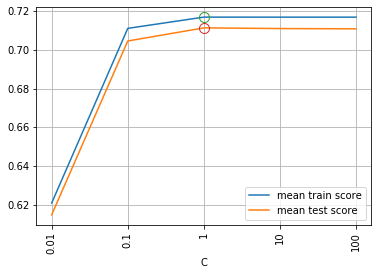

In [98]:
plt.plot(range(result_svr_linear.shape[0]), result_svr_linear['mean_train_score'], label = 'mean train score')
plt.plot(range(result_svr_linear.shape[0]), result_svr_linear['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr_linear.shape[0]), result_svr_linear['param_C'], rotation = 90)
plt.plot([grid_svr_linear.best_index_], result_svr_linear['mean_train_score'][grid_svr_linear.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svr_linear.best_index_], result_svr_linear['mean_test_score'][grid_svr_linear.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('C')

### SVR with Kernel as 'Linear' Result:

#### Best parameter: {'C': 1}

#### Test Score: 0.7067

#### Mean Cross - Validation Score: 0.7109

## SVR with Kernel as 'Poly'

In [99]:
grid_parms_svrp = {'C': [1, 10, 100],'degree':[1,3]}

In [100]:
svr_poly = SVR(kernel='poly')
grid_svr_poly = GridSearchCV(estimator = svr_poly,param_grid = grid_parms_svrp,return_train_score=True,n_jobs= -1,cv=3)

In [101]:
grid_svr_poly.fit(X_train,y_train)

C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'degree': [1, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [102]:
print("Best parameters: {}".format(grid_svr_poly.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svr_poly.best_score_))
pd.DataFrame(grid_svr_poly.cv_results_)

Best parameters: {'C': 100, 'degree': 3}
Best cross-validation score: 0.7378


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.032249,0.003672,0.006314,0.000473,1,1,"{'C': 1, 'degree': 1}",0.689259,0.693176,0.702902,0.695112,0.005736,5,0.698343,0.703484,0.704544,0.702124,0.002708
1,0.029917,0.000816,0.007312,0.000470,1,3,"{'C': 1, 'degree': 3}",0.604405,0.602563,0.594523,0.600497,0.004290,6,0.604740,0.616137,0.615501,0.612126,0.005229
2,0.070809,0.008020,0.005651,0.000471,10,1,"{'C': 10, 'degree': 1}",0.707390,0.715254,0.706632,0.709758,0.003898,3,0.715076,0.717216,0.719803,0.717365,0.001933
3,0.039892,0.004071,0.007315,0.001880,10,3,"{'C': 10, 'degree': 3}",0.729271,0.711448,0.719514,0.720078,0.007287,2,0.734192,0.747872,0.743667,0.741910,0.005721
4,0.155584,0.011828,0.003989,0.000815,100,1,"{'C': 100, 'degree': 1}",0.706554,0.715607,0.705767,0.709309,0.004465,4,0.715346,0.717289,0.720195,0.717610,0.001993
5,0.066156,0.007696,0.003989,0.000814,100,3,"{'C': 100, 'degree': 3}",0.746196,0.725586,0.741626,0.737803,0.008838,1,0.775024,0.786327,0.782190,0.781181,0.004669


In [103]:
svr_p = SVR(kernel='poly',C=100,degree = 1)
svr_p.fit(X_train, y_train)
print("Train score: {}".format(svr_p.score(X_train, y_train)))
print("Test score: {}".format(svr_p.score(X_test, y_test)))

C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train score: 0.7166149077432229
Test score: 0.7064810162275874


In [104]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#scores = cross_val_score(logreg, iris.data, iris.target)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svr_p, X_train, y_train, cv=kfold)))
scores = cross_val_score(svr_p, X_train, y_train, cv=kfold)
print("Mean score: {}".format(np.mean(scores)))

C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Cross-validation scores:
[0.69428339 0.72796441 0.71575798 0.71489176 0.73124029 0.68194199]


C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Mean score: 0.7110133026314838


In [105]:
result_svr_poly= pd.DataFrame(grid_svr_poly.cv_results_)
result_svr_poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.032249,0.003672,0.006314,0.000473,1,1,"{'C': 1, 'degree': 1}",0.689259,0.693176,0.702902,0.695112,0.005736,5,0.698343,0.703484,0.704544,0.702124,0.002708
1,0.029917,0.000816,0.007312,0.000470,1,3,"{'C': 1, 'degree': 3}",0.604405,0.602563,0.594523,0.600497,0.004290,6,0.604740,0.616137,0.615501,0.612126,0.005229
2,0.070809,0.008020,0.005651,0.000471,10,1,"{'C': 10, 'degree': 1}",0.707390,0.715254,0.706632,0.709758,0.003898,3,0.715076,0.717216,0.719803,0.717365,0.001933
3,0.039892,0.004071,0.007315,0.001880,10,3,"{'C': 10, 'degree': 3}",0.729271,0.711448,0.719514,0.720078,0.007287,2,0.734192,0.747872,0.743667,0.741910,0.005721
4,0.155584,0.011828,0.003989,0.000815,100,1,"{'C': 100, 'degree': 1}",0.706554,0.715607,0.705767,0.709309,0.004465,4,0.715346,0.717289,0.720195,0.717610,0.001993
5,0.066156,0.007696,0.003989,0.000814,100,3,"{'C': 100, 'degree': 3}",0.746196,0.725586,0.741626,0.737803,0.008838,1,0.775024,0.786327,0.782190,0.781181,0.004669


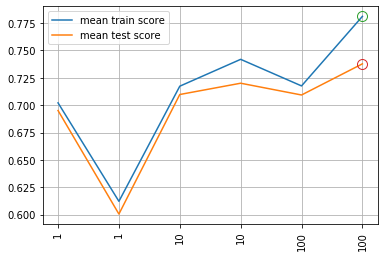

In [106]:
plt.plot(range(result_svr_poly.shape[0]), result_svr_poly['mean_train_score'], label = 'mean train score')
plt.plot(range(result_svr_poly.shape[0]), result_svr_poly['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr_poly.shape[0]), result_svr_poly['param_C'], rotation = 90)
plt.plot([grid_svr_poly.best_index_], result_svr_poly['mean_train_score'][grid_svr_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svr_poly.best_index_], result_svr_poly['mean_test_score'][grid_svr_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()

### SVR with Kernel as 'Poly' Result:

#### Best Parameter: {'C': 100, 'degree': 3}

#### Test Score: 0.7065

#### Mean Cross - Validation Score: 0.7110

## SVR with Kernel as 'rbf'

In [107]:
grid_parms_rbf = {'C': [0.1, 1, 10, 100],'gamma':[0.1, 1, 10, 100]}

In [108]:
svr_rbf = SVR(kernel='rbf')
grid_svr_rbf = GridSearchCV(estimator = svr_rbf,param_grid = grid_parms_rbf,return_train_score=True,n_jobs= -1,cv=3)

In [109]:
grid_svr_rbf.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [110]:
print("Best parameters: {}".format(grid_svr_rbf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svr_rbf.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.7425


In [111]:
svr_rbf = SVR(kernel='rbf',C=100,gamma=0.1)
svr_rbf.fit(X_train, y_train)
print("Train score: {}".format(svr_rbf.score(X_train, y_train)))
print("Test score: {}".format(svr_rbf.score(X_test, y_test)))

Train score: 0.8044681354177308
Test score: 0.7288505960620149


In [112]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=6)
print("Cross-validation scores: {}".format(cross_val_score(svr_rbf, X_train, y_train, cv=kfold)))
scores = cross_val_score(svr_rbf, X_train, y_train, cv=kfold)
print("Mean score: {}".format(np.mean(scores)))

Cross-validation scores: [0.7106943  0.7786646  0.72596624 0.72279042 0.75383037 0.72701778]
Mean score: 0.7364939532823169


In [113]:
result_rbf = pd.DataFrame(grid_svr_rbf.cv_results_)
result_rbf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.031583,0.000941,0.010970,0.000815,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.640858,0.646322,0.656050,0.647743,0.006283,7,0.650555,0.656229,0.659937,0.655574,0.003858
1,0.034906,0.001628,0.009641,0.000470,0.1,1,"{'C': 0.1, 'gamma': 1}",0.693036,0.693481,0.688240,0.691585,0.002373,5,0.732941,0.742877,0.742408,0.739409,0.004577
2,0.058842,0.013699,0.013963,0.000814,0.1,10,"{'C': 0.1, 'gamma': 10}",0.256338,0.273126,0.249214,0.259559,0.010024,12,0.597783,0.594316,0.607700,0.599933,0.005672
3,0.069477,0.015129,0.016290,0.000470,0.1,100,"{'C': 0.1, 'gamma': 100}",0.001729,0.000920,-0.013591,-0.003647,0.007039,16,0.473829,0.455918,0.468736,0.466161,0.007535
4,0.037898,0.000815,0.008644,0.000470,1,0.1,"{'C': 1, 'gamma': 0.1}",0.731365,0.733038,0.732336,0.732247,0.000686,3,0.742536,0.749548,0.750130,0.747405,0.003451
5,0.058510,0.001244,0.008644,0.000470,1,1,"{'C': 1, 'gamma': 1}",0.727415,0.717986,0.730550,0.725317,0.005339,4,0.818382,0.829069,0.828358,0.825269,0.004879
6,0.066156,0.011234,0.012965,0.000814,1,10,"{'C': 1, 'gamma': 10}",0.354235,0.342323,0.363691,0.353416,0.008742,9,0.836314,0.838848,0.837846,0.837669,0.001042
7,0.078457,0.015797,0.023604,0.012224,1,100,"{'C': 1, 'gamma': 100}",0.001448,-0.007090,0.003634,-0.000669,0.004627,13,0.820719,0.825199,0.824134,0.823351,0.001911
8,0.092087,0.013240,0.008643,0.000470,10,0.1,"{'C': 10, 'gamma': 0.1}",0.740057,0.746411,0.740914,0.742461,0.002815,1,0.774480,0.782119,0.781769,0.779456,0.003521
9,0.153590,0.015515,0.009308,0.000470,10,1,"{'C': 10, 'gamma': 1}",0.673671,0.652688,0.676075,0.667478,0.010504,6,0.853699,0.860007,0.864155,0.859287,0.004299


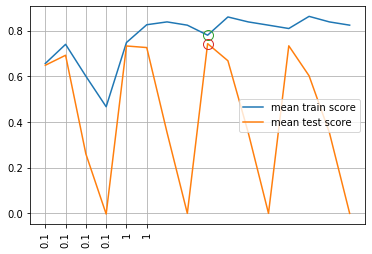

In [114]:
plt.plot(range(result_rbf.shape[0]), result_rbf['mean_train_score'], label = 'mean train score')
plt.plot(range(result_rbf.shape[0]), result_rbf['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr_poly.shape[0]), result_rbf['param_C'], rotation = 90)
plt.plot([grid_svr_rbf.best_index_], result_rbf['mean_train_score'][grid_svr_rbf.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svr_rbf.best_index_], result_rbf['mean_test_score'][grid_svr_rbf.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()

### SVR with Kernel as 'rbf' Result:

#### Best Parameter: {'C': 10, 'gamma': 0.1}

#### Test Score: 0.7289

#### Mean Cross - Validation Score: 0.7365

## Decision Tree Regressor

In [115]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [116]:
y_pred = regressor.predict(X_test)

In [117]:
df2 = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df2

,Real Values,Predicted Values
0,0.635,0.421
1,0.841,0.727
2,0.945,0.824
3,0.648,0.479
4,0.257,0.107
5,0.588,0.794
6,0.637,0.675
7,0.580,0.770
8,0.742,0.752
9,0.880,0.815


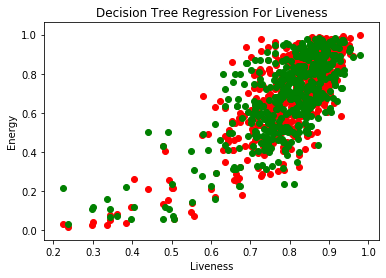

In [118]:
X_grid = np.arange(min(X[:,7]), max(X[:,7]), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test[:,7], y_test, color = 'red')
plt.scatter(X_test[:,7], y_pred, color = 'green')
plt.title('Decision Tree Regression For Liveness')
plt.xlabel('Liveness')
plt.ylabel('Energy')
plt.show()

## Best Model for the Prediction 

In [119]:
d = {'Model': ['Linear Regression', 'KNN Regression','Ridge Regression','Lasso Regression',
               'Polynominal Regression','Simple SVR','SVR with Linear kernel','SVR with Poly kernel',
               'SVR with rbf kernel'], 
     'Cross-Validation Score':[grid_search_lr.best_score_,grid_search_knn.best_score_,
                               grid_search_ridge.best_score_,grid_search_lasso.best_score_,
                               grid_poly.best_score_,grid_svrl.best_score_,
                               grid_svr_linear.best_score_,grid_svr_poly.best_score_,
                               grid_svr_rbf.best_score_]}

In [120]:
result = pd.DataFrame(data=d)
result

,Model,Cross-Validation Score
0,Linear Regression,0.711074
1,KNN Regression,0.550138
2,Ridge Regression,0.709673
3,Lasso Regression,0.601946
4,Polynominal Regression,0.709610
5,Simple SVR,0.706442
6,SVR with Linear kernel,0.711354
7,SVR with Poly kernel,0.737803
8,SVR with rbf kernel,0.742461


## Since the Cross - Validation Score is highest for SVR with rbf kernel model, we choose that model for prediction

In [121]:
pol = PolynomialFeatures(degree = 2)
X_pol = pol.fit_transform(X_train_org)
Xt_pol = pol.fit_transform(X_test_org)
pol_reg = SVR(kernel='rbf')
pol_reg.fit(X_pol,y_train)
ypred = pol_reg.predict(Xt_pol)

C:\Users\dhurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [122]:
with np.printoptions(threshold=np.inf):
    print(ypred)

[0.66328498 0.66328498 0.66328498 0.66328498 0.66328498 0.66328498
 0.66328498 0.66328498 0.66328498 0.66328498 0.66328498 0.66328498
 0.66328498 0.66328498 0.66328498 0.66328498 0.66328498 0.66328498
 0.66328498 0.66328498 0.66328498 0.66328498 0.66328498 0.66328498
 0.66328498 0.66328498 0.66328498 0.66328498 0.66328498 0.66328498
 0.66328498 0.66328498 0.66328498 0.66328498 0.66328498 0.66328498
 0.66328498 0.66328498 0.66328498 0.66328498 0.66328498 0.66328498
 0.66328498 0.66328498 0.66328498 0.66328498 0.66328498 0.66328498
 0.66328498 0.66328498 0.66328498 0.66328498 0.66328498 0.66328498
 0.66328498 0.66328498 0.66328498 0.66328498 0.66328498 0.66328498
 0.66328498 0.66328498 0.66328498 0.66328498 0.66328498 0.66328498
 0.66328498 0.66328498 0.66328498 0.66328498 0.66328498 0.66328498
 0.66328498 0.66328498 0.66328498 0.66328498 0.66328498 0.66328498
 0.66328498 0.66328498 0.66328498 0.66328498 0.66328498 0.66328498
 0.66328498 0.66328498 0.66328498 0.66328498 0.66328498 0.6632